Hi Everyone! I'm trying to analyse customer behavior and sales forecast for Supermarket dataset.
Hope everyone enjoy with my analysis :) If you have any suggestion, please feel free to comment.

Let's start it!

# Data Overview

## Context
Supermarkets are a convenient and popular way to shop for groceries and other necessities. They offer a wide variety of products and services, and they are typically located in convenient locations. By understanding the different needs of their customers, supermarkets can better meet those needs and provide a better shopping experience.


## Table Information
We have 17 column in table which are :
1. Invoice id: Computer generated sales slip invoice identification number
2. Branch: Branch of supercenter (3 branches are available identified by A, B and C).
3. City: Location of supercenters
4. Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. Gender: Gender type of customer
6. Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. Unit price: Price of each product in $
8. Quantity: Number of products purchased by customer
9. Tax: 5% tax fee for customer buying
10. Total: Total price including tax
11. Date: Date of purchase (Record available from January 2019 to March 2019)
12. Time: Purchase time (10am to 9pm)
13. Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. COGS: Cost of goods sold
15. Gross margin percentage: Gross margin percentage
16. Gross income: Gross income
17. Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [1]:
## Import data and library
library(readr)
library(tidyverse)
library(dplyr)
library(janitor)
supermarket <- read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ purrr     1.0.1
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Rows: 1000 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Invoice ID, Branch, City, Customer type, Gender, Product line, Dat...
dbl  (8): Unit price, Quantity, Tax 5%, Total, cogs, gross margin percentage...
time (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the 

In [3]:
## Preview and cleaning data
head(supermarket)
df <- data.frame(supermarket)
df <- clean_names(supermarket)
colnames(df)

df %>% 
  is.null() %>% 
  sum()

Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1


[1] "invoice_id"              "branch"                 
 [3] "city"                    "customer_type"          
 [5] "gender"                  "product_line"           
 [7] "unit_price"              "quantity"               
 [9] "tax_5_percent"           "total"                  
[11] "date"                    "time"                   
[13] "payment"                 "cogs"                   
[15] "gross_margin_percentage" "gross_income"           
[17] "rating"

[1] 0

# Customer Insight

By comprehending the distinct trends between the two genders and the top product lines on which they spend, we can create promotions that are tailored to their requirements. Furthermore, we can predict and stock goods with the items that customers desire and require, which can assist in lowering costs.

In [3]:
## To find customer insigh and product trend line
## Top 10 popular product line
top_sales_mix <- df %>%
                        select(gender , product_line, total) %>% 
                        group_by(product_line) %>%
                        arrange(desc(total)) 
top_sales_female <- df %>%
                        select(gender , product_line, total) %>% 
                        filter(gender == 'Female') %>% 
                        group_by(product_line) %>%
                        arrange(desc(total)) %>% 
                        head(10)
top_sales_male <- df %>%
                      select(gender , product_line, total) %>% 
                      filter(gender == 'Male') %>% 
                      group_by(product_line) %>%
                      arrange(desc(total)) %>% 
                      head(10)

total_top_sales <- df %>%
                      group_by(product_line) %>%
                      summarise(total_sales = sum(total)) %>% 
                      arrange(desc(total_sales))
head(total_top_sales)

product_line,total_sales
<chr>,<dbl>
Food and beverages,56144.84
Sports and travel,55122.83
Electronic accessories,54337.53
Fashion accessories,54305.89
Home and lifestyle,53861.91
Health and beauty,49193.74


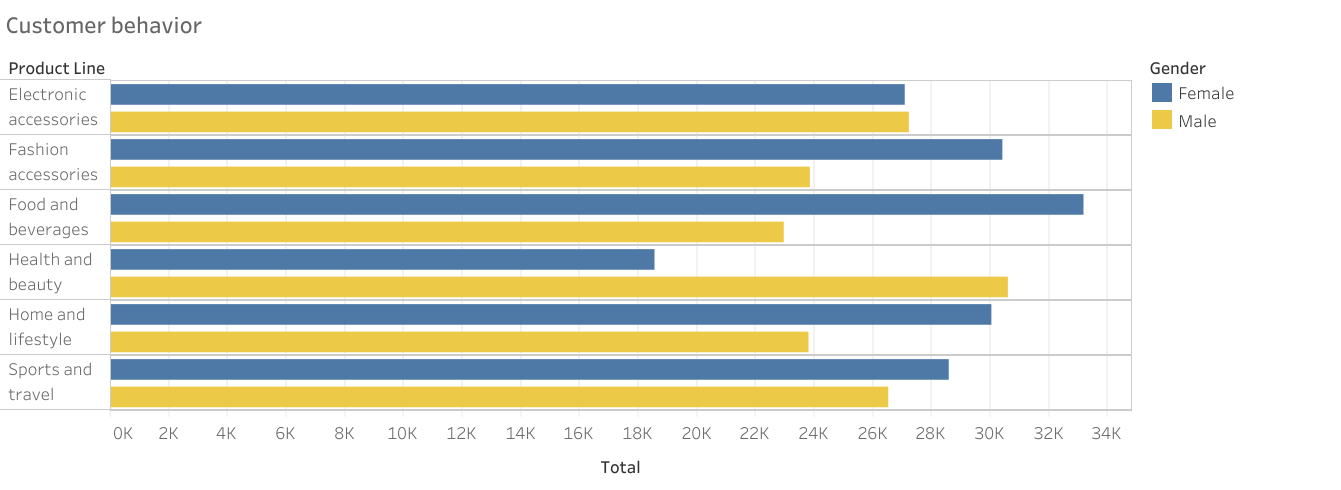

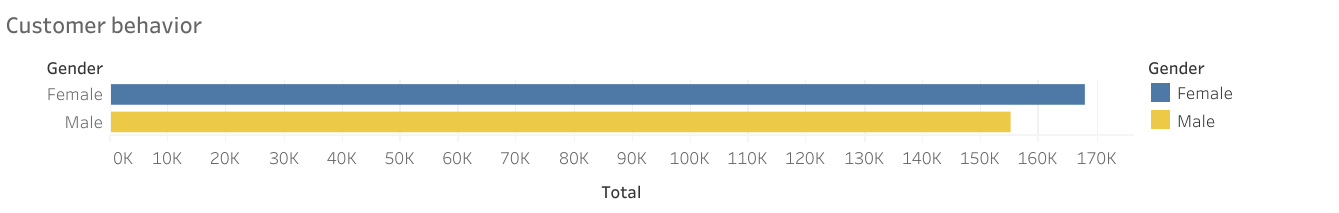

In [5]:
## Customer type by gender
gender_group <- df %>% 
  select(gender, customer_type) %>% 
  group_by(gender) %>% 
  table()
gender_group

        customer_type
gender   Member Normal
  Female    261    240
  Male      240    259

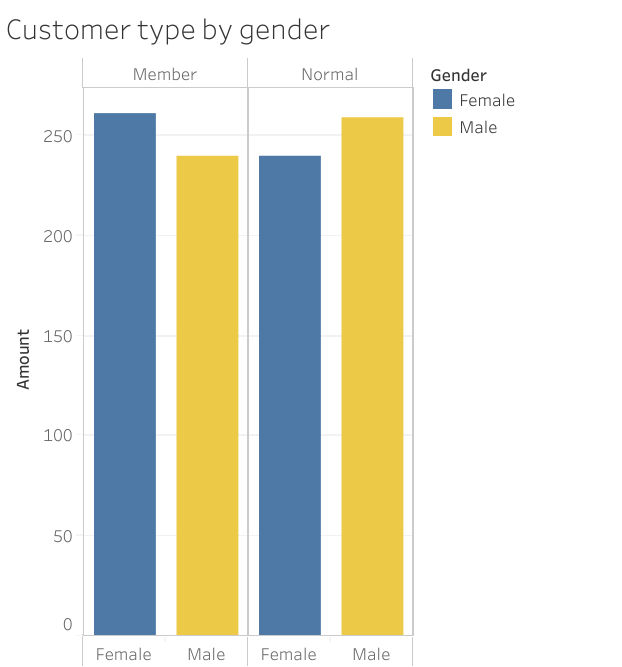

In [6]:
## Best seller in each customer type
cus_best <- df %>% 
  select(customer_type, total) %>% 
  group_by(customer_type) %>% 
  summarise(sum(total))
cus_best

customer_type,sum(total)
<chr>,<dbl>
Member,164223.4
Normal,158743.3


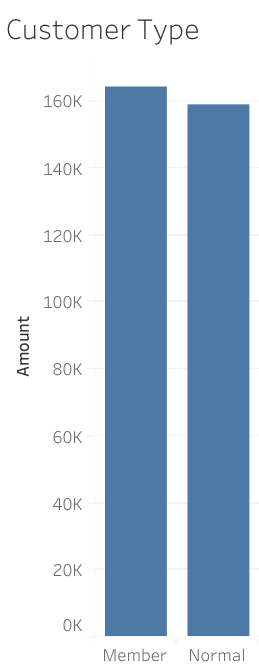

In [7]:
## Customer member by branch
branch_group <- df %>% 
  select(branch, customer_type) %>% 
  filter(customer_type == "Member") %>% 
  group_by(branch) %>% 
  table()
branch_group

      customer_type
branch Member
     A    167
     B    165
     C    169

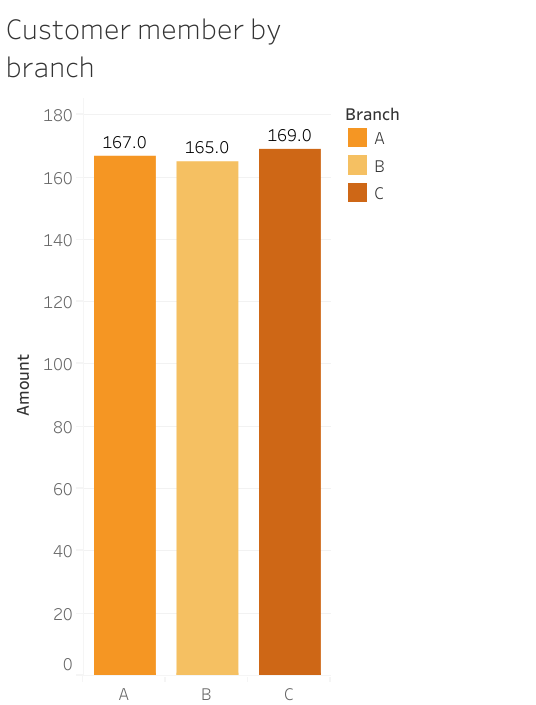

In [8]:
## Average rating by branch
rating_group <- df %>% 
  select(rating, branch) %>% 
  group_by(branch) %>% 
  summarise(mean(rating))
rating_group

branch,mean(rating)
<chr>,<dbl>
A,7.027059
B,6.818072
C,7.072866


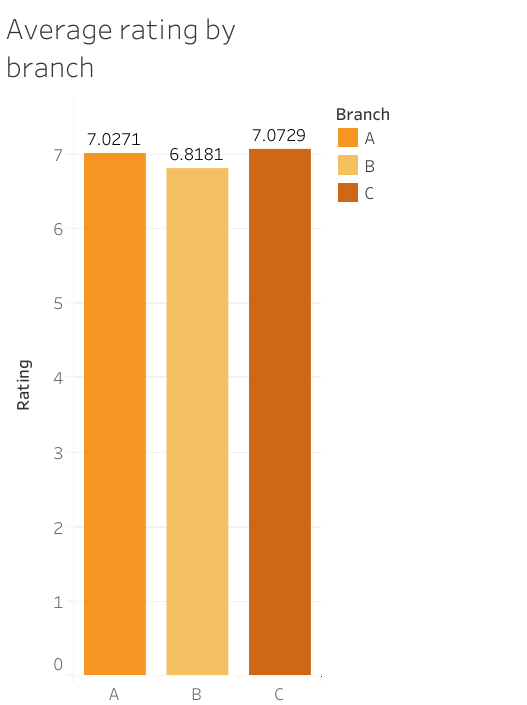

# Company Sales and Profit

In [9]:
# To find sales and profit
## Sales in each month
df2 <- separate(df, date, into = c("month", "day", "year"), sep = "/")

best1 <- df2 %>% 
  select(day,month, total) %>% 
  filter(month == 1) %>% 
  group_by(day) %>% 
  summarise(sum(total)) %>% 
  arrange(desc(`sum(total)`))
best1

best2 <- df2 %>% 
  select(day, month, total) %>% 
  filter(month == 2) %>% 
  group_by(day) %>% 
  summarise(sum(total)) %>% 
  arrange(desc(`sum(total)`))
best2

best3 <- df2 %>% 
  select(day, month, total) %>% 
  filter(month == 3) %>% 
  group_by(day) %>% 
  summarise(sum(total)) %>% 
  arrange(desc(`sum(total)`))
best3

month_sales <- df2 %>% 
  select(month, total) %>% 
  group_by(month) %>% 
  summarise(sum(total))
month_sales 

## Monthly Profit
month_profit <- df2 %>% 
  select(month, gross_income) %>% 
  group_by(month) %>% 
  summarise(sum(gross_income)) %>% 
  arrange(desc(`sum(gross_income)`))
month_profit
  

## Profit in each branch
branch_profit <- df %>% 
  select(branch, gross_income) %>% 
  group_by(branch) %>% 
  summarise(sum(gross_income)) %>% 
  arrange(desc(`sum(gross_income)`))
branch_profit

## Profit in each product category
product_profit <- df %>% 
  select(product_line, gross_income) %>% 
  group_by(product_line) %>% 
  summarise(sum(gross_income)) %>% 
  arrange(desc(`sum(gross_income)`))
product_profit

day,sum(total)
<chr>,<dbl>
23,5994.188
15,5944.260
24,5402.051
8,5293.733
31,5232.497
12,5184.764
28,4999.711
19,4914.725
1,4745.181


day,sum(total)
<chr>,<dbl>
7,7228.2105
15,6830.7855
27,5859.4515
3,5467.9275
17,5299.5705
8,5084.6565
25,4807.2360
11,4542.1530
19,4228.1190


day,sum(total)
<chr>,<dbl>
9,7474.047
14,7214.634
2,6560.306
5,6230.878
19,5740.392
20,5458.204
3,4853.173
30,4487.060
23,4095.042


month,sum(total)
<chr>,<dbl>
1,116291.87
2,97219.37
3,109455.51


month,sum(gross_income)
<chr>,<dbl>
1,5537.708
3,5212.167
2,4629.494


branch,sum(gross_income)
<chr>,<dbl>
C,5265.176
A,5057.160
B,5057.032


product_line,sum(gross_income)
<chr>,<dbl>
Food and beverages,2673.564
Sports and travel,2624.896
Electronic accessories,2587.501
Fashion accessories,2585.995
Home and lifestyle,2564.853
Health and beauty,2342.559


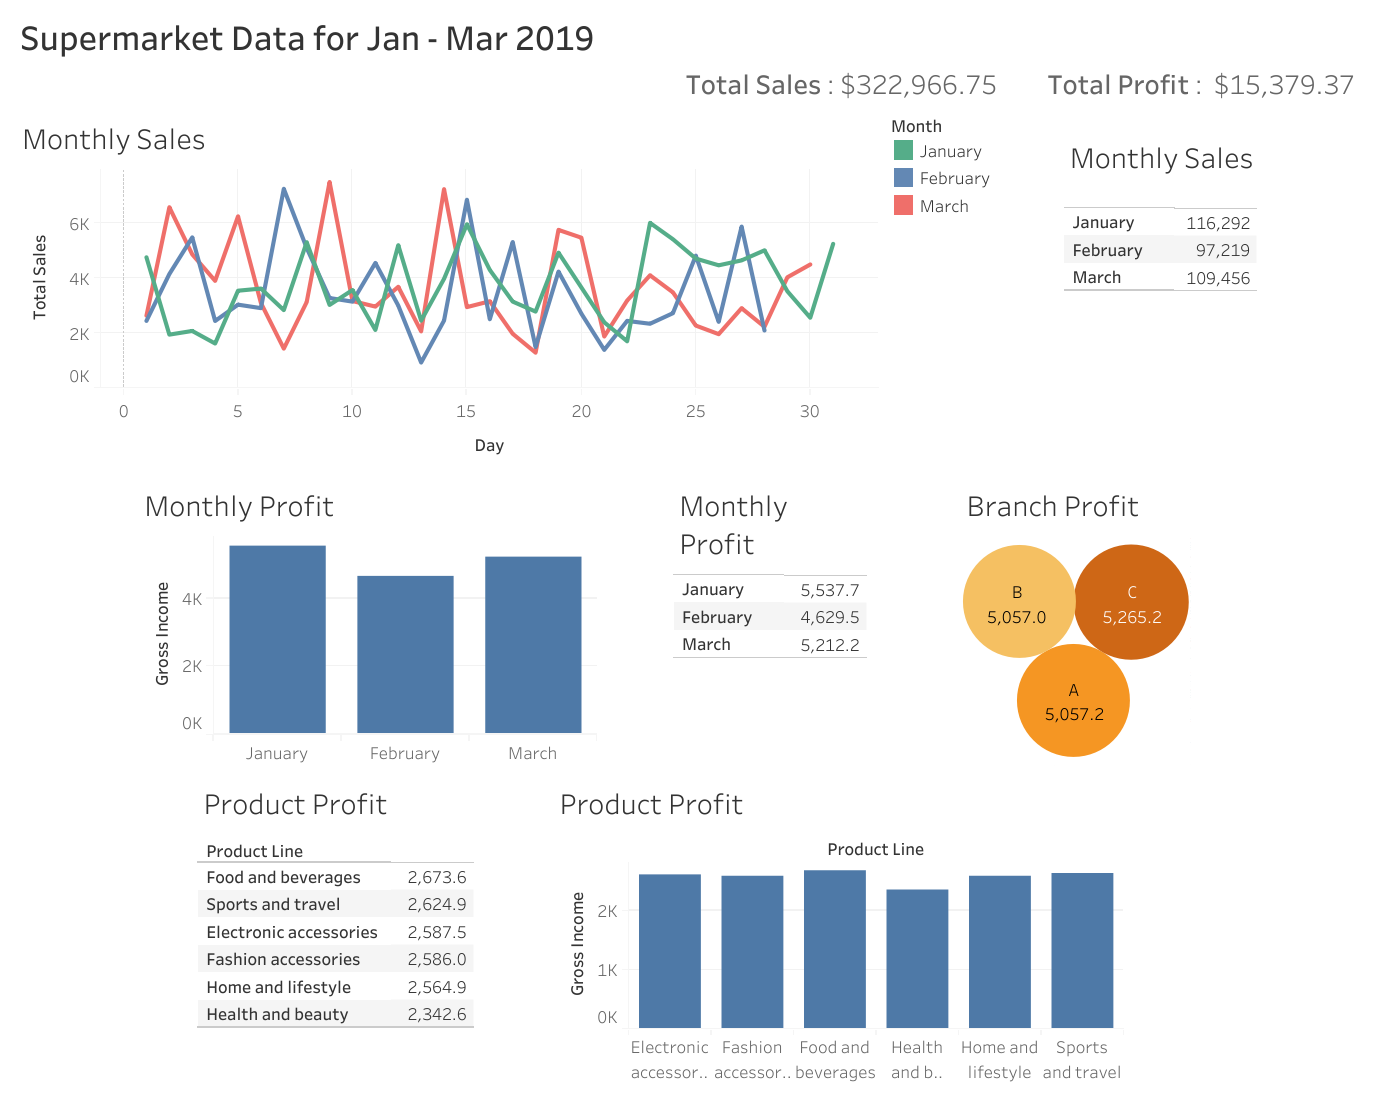

# Sales Forecast
Based on our analysis of historical sales data, we anticipate that next month's sales is close to last 3 month but decrease from last month.

In [4]:
## Predict total sales on Apr 2019
# Monthly total sales
df2 <- df %>%
          separate(date, into = c("month", "day", "year"), sep = "/")
df2 %>% 
    group_by(month) %>% 
    summarise(total_sales = sum(total))

# Create model and prediction
sales_data <- data.frame(
  months <- as.Date(c("2019-01-01", "2019-02-01" ,"2019-03-01")),
  sales <- c(116292, 97219, 109456)
  )
model <- lm(sales ~ months, data = sales_data)
predict_month <- data.frame(months = as.Date("2019-04-01"))
predict_month$month <- as.Date(predict_month$month)
predict <- predict(model, newdata = predict_month)
print(predict)


month,total_sales
<chr>,<dbl>
1,116291.87
2,97219.37
3,109455.51


       1 

100170.6 


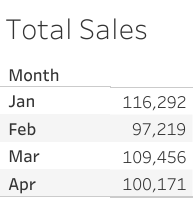

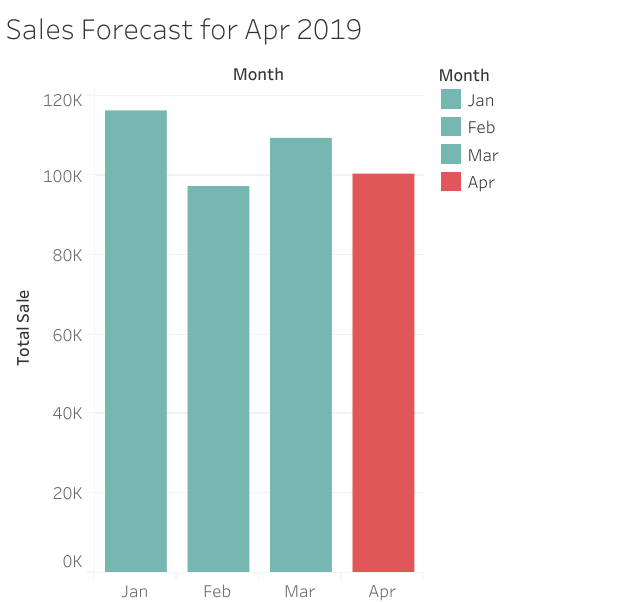

We estimated sales value for Apr 2019 for evaluate model and it difference with predicted model about 170.58

In [5]:
# Evaluate the model performance
# Estimated sales value for Apr 2019
actual_sales <- c(100000)  
squar_error <- (actual_sales - predict) ^ 2
(rmse <- sqrt(mean(squar_error)))

[1] 170.5806

# Relationship between customer type and profit
Correlation between customer type and profit is about 0.02. Two variable are kindly in relationship with same direction. From the output member customer have profit more than normal customer 260.96.

In [11]:
## Correlation between customer type and profit
cus_type <- if_else(df$customer_type == "Member", 1, 0)
(correlation <- cor(cus_type, df$gross_income))

df %>% select(customer_type, gross_income) %>% 
  group_by(customer_type) %>% 
  summarise(sum(gross_income))

[1] 0.01967028

customer_type,sum(gross_income)
<chr>,<dbl>
Member,7820.164
Normal,7559.205


# Summary
1. Customer behavior is show female spending more than male and different product line in both gender
2. Forecast total sales is close to last 3 month but decrease from last month
3. In January, profits are generally high, branch C stands out as a high-profit location, and food&beverages being the best-selling product category. 
4. Customer type and profit are in relationship with same direction


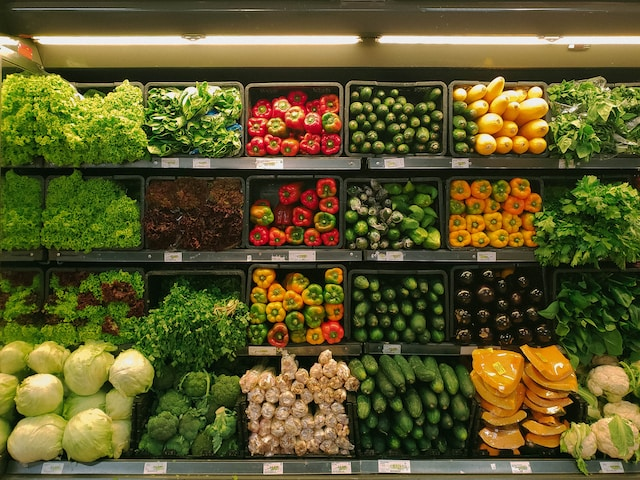